In [1]:
import sys
sys.path.append('../utils')
from nd_tools import lee_filter

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.cluster import KMeans
from skimage.restoration import denoise_tv_bregman

In [2]:
data_dir = Path('../data')
backscatter_tifs = sorted(list(data_dir.glob('./*backscatter*.tif')))
backscatter_tifs

[PosixPath('../data/alos_backscatter_hh.tif'),
 PosixPath('../data/alos_backscatter_hv.tif')]

In [3]:
with rasterio.open(backscatter_tifs[0]) as ds:
    hh = ds.read(1)
    profile = ds.profile

with rasterio.open(backscatter_tifs[1]) as ds:
    hv = ds.read(1)

In [4]:
hv.shape

(500, 484)

In [5]:
hv_lee = lee_filter(hv, 5)

Text(0.5, 1.0, 'Lee HV')

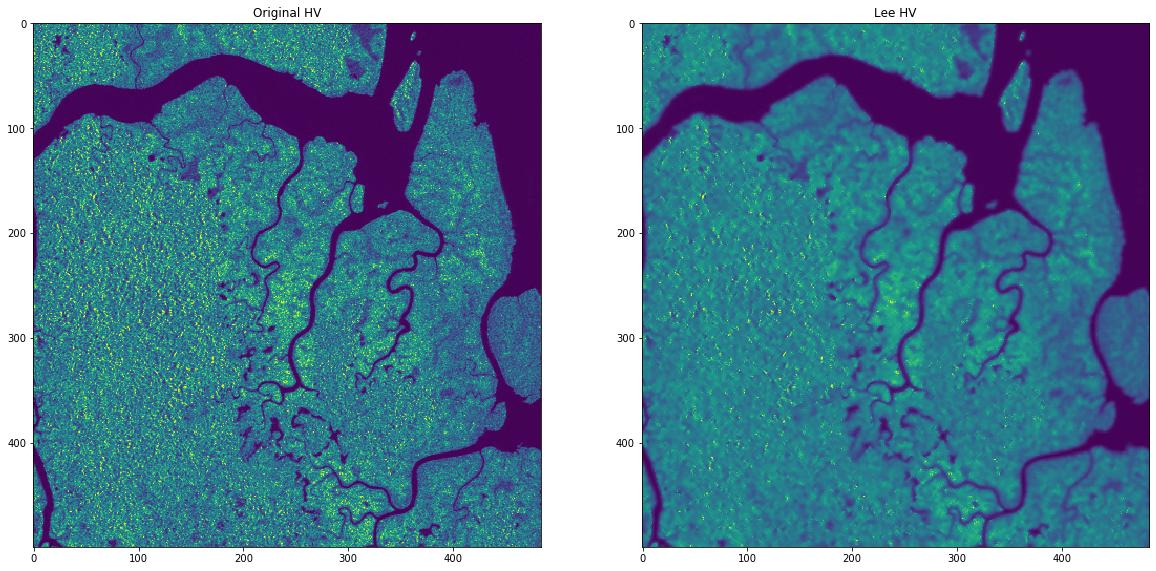

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(hv, vmin=0, vmax=.15)
ax[0].set_title('Original HV')

ax[1].imshow(hv_lee, vmin=0, vmax=.15)
ax[1].set_title('Lee HV')

Text(0.5, 1.0, 'Lee HV (Size=5)')

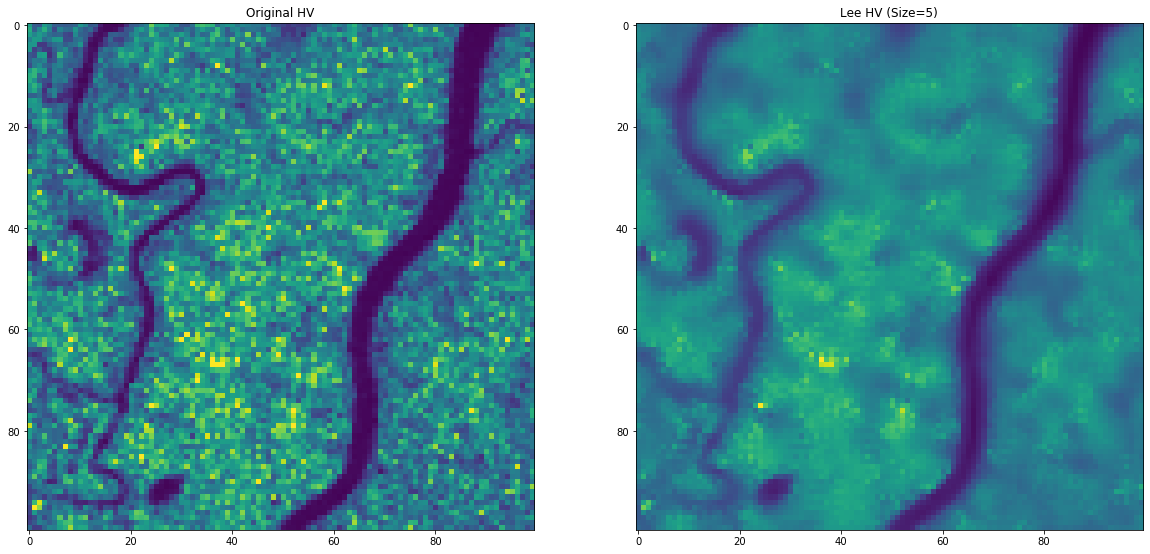

In [7]:
s_index = np.s_[200:300, 200: 300]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(hv[s_index], vmin=0, vmax=.15)
ax[0].set_title('Original HV')

ax[1].imshow(hv_lee[s_index], vmin=0, vmax=.15)
ax[1].set_title('Lee HV (Size=5)')

## Sizes of Lee Filters

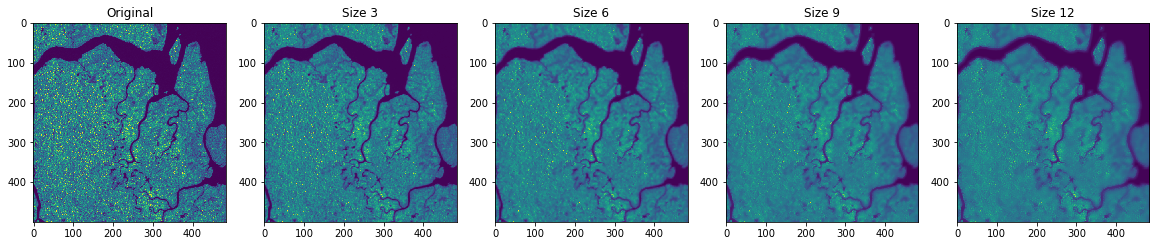

In [8]:
sizes = [0] + list(range(3, 13, 3))
N = len(sizes)
fig, ax = plt.subplots(1, N, figsize=(20, 10))
for (ax, size) in zip(ax.ravel(), sizes):
    if size == 0:
        ax.imshow(hv, vmin=0, vmax=.15)
        ax.set_title('Original')
    else:
        hv_lee = lee_filter(hv, size) 
        ax.imshow(hv_lee, vmin=0, vmax=.15)
        ax.set_title(f'Size {size}')

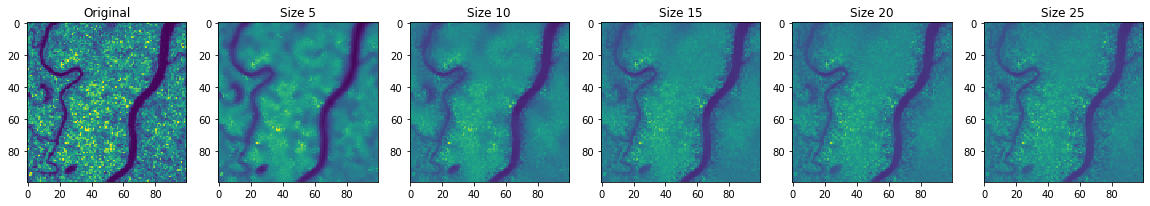

In [9]:
sizes = [0] + list(range(5, 26, 5))
N = len(sizes)
fig, ax = plt.subplots(1, N, figsize=(20, 10))
for (ax, size) in zip(ax.ravel(), sizes):
    if size == 0:
        ax.imshow(hv[s_index], vmin=0, vmax=.15)
        ax.set_title('Original')
    else:
        hv_lee = lee_filter(hv, size) 
        ax.imshow(hv_lee[s_index], vmin=0, vmax=.15)
        ax.set_title(f'Size {size}')

# Total Variation

In [10]:
def fwd(img):
    return 10 * np.log10(img)

def bwd(img):
    return 10**(img / 10)

def tv_denoise(img, weight):
    img_db = fwd(img)
    img_db_tv = denoise_tv_bregman(img_db, weight)
    img_tv = bwd(img_db_tv)
    return img_tv

In [11]:
hv_tv = tv_denoise(hv, 1)

Text(0.5, 1.0, 'TV HV')

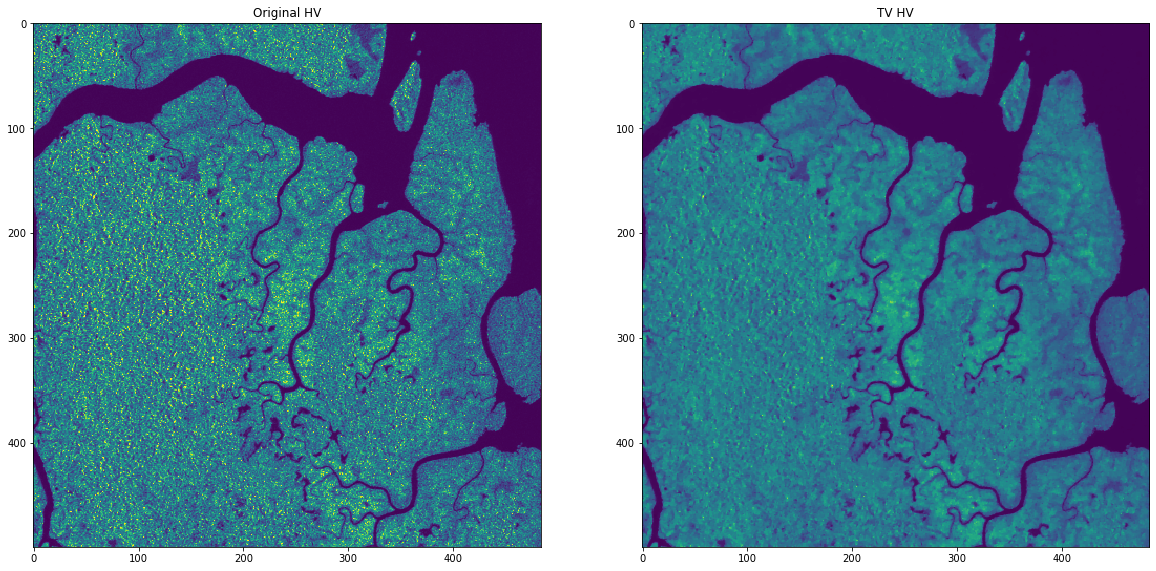

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(hv, vmin=0, vmax=.15)
ax[0].set_title('Original HV')

ax[1].imshow(hv_tv, vmin=0, vmax=.15)
ax[1].set_title('TV HV')

Text(0.5, 1.0, 'TV HV')

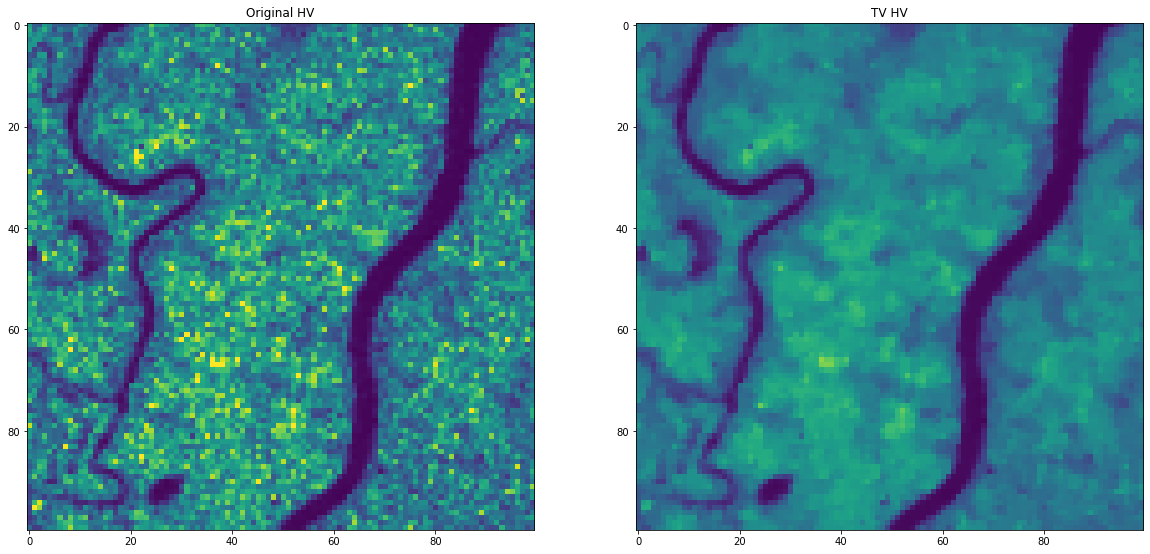

In [13]:
s_index = np.s_[200:300, 200: 300]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(hv[s_index], vmin=0, vmax=.15)
ax[0].set_title('Original HV')

ax[1].imshow(hv_tv[s_index], vmin=0, vmax=.15)
ax[1].set_title('TV HV')

# Excercise 1

Inspect the Weights for HV. Try for HH.

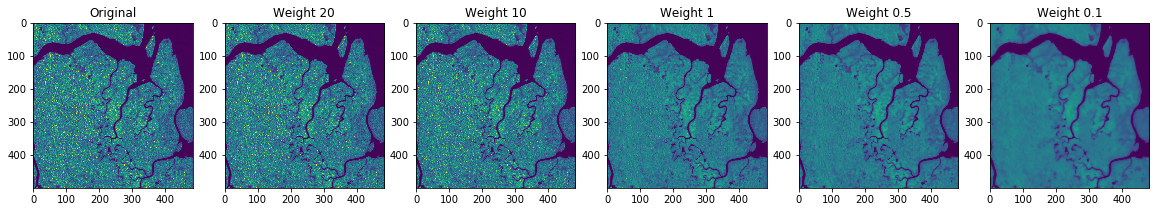

In [14]:
## Answer
weights = [0] + [20, 10, 1, .5, .1]
N = len(weights)
fig, ax = plt.subplots(1, N, figsize=(20, 10))
for (ax, weight) in zip(ax.ravel(), weights):
    if weight == 0:
        ax.imshow(hv, vmin=0, vmax=.15)
        ax.set_title('Original')
    else:
        hv_tv = tv_denoise(hv, weight) 
        ax.imshow(hv_tv, vmin=0, vmax=.15)
        ax.set_title(f'Weight {weight}')

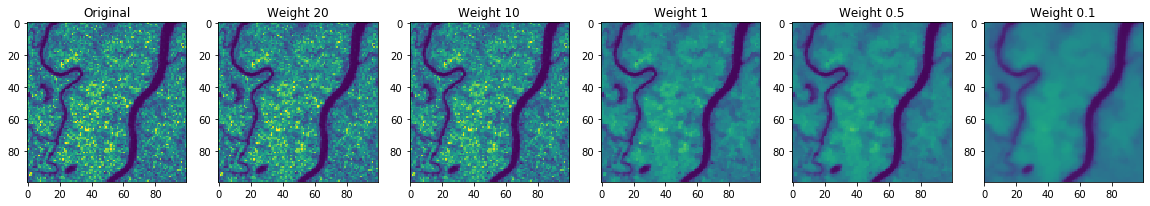

In [15]:
## Answer
weights = [0] + [20, 10, 1, .5, .1]
N = len(weights)
fig, ax = plt.subplots(1, N, figsize=(20, 10))
for (ax, weight) in zip(ax.ravel(), weights):
    if weight == 0:
        ax.imshow(hv[s_index], vmin=0, vmax=.15)
        ax.set_title('Original')
    else:
        hv_tv = tv_denoise(hv, weight) 
        ax.imshow(hv_tv[s_index], vmin=0, vmax=.15)
        ax.set_title(f'Weight {weight}')

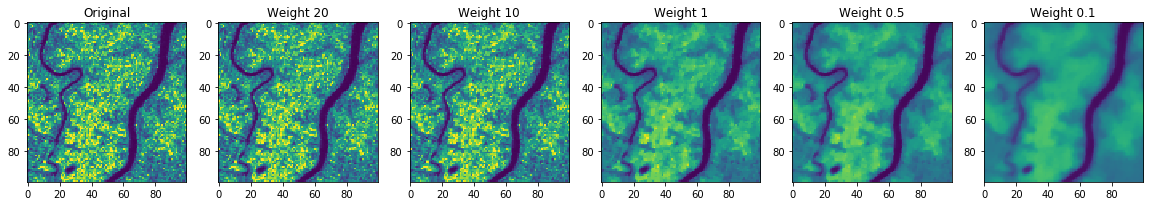

In [16]:
## Answer
weights = [0] + [20, 10, 1, .5, .1]
N = len(weights)
fig, ax = plt.subplots(1, N, figsize=(20, 10))
for (ax, weight) in zip(ax.ravel(), weights):
    if weight == 0:
        ax.imshow(hh[s_index], vmin=0, vmax=.5)
        ax.set_title('Original')
    else:
        hh_tv = tv_denoise(hh, weight) 
        ax.imshow(hh_tv[s_index], vmin=0, vmax=.5)
        ax.set_title(f'Weight {weight}')

# Excercise 2

Select a weight and write your rasters to tif. Inspect in QGIS.

In [17]:
## Answer

out_dir = Path('out')
out_dir.mkdir(exist_ok=True)

with rasterio.open(backscatter_tifs[0]) as ds:
    reference_profile = ds.profile

In [18]:
## Answer

def open_one(path):
    with rasterio.open(path) as ds:
        img = ds.read(1)
    return img

def tv_partial(band):
    return tv_denoise(band, .5)

def write_one(band, name):
    dest_path = out_dir/name
    with rasterio.open(dest_path, 'w', **reference_profile) as ds:
        ds.write(band, 1)
    return dest_path
        
def tv_writer(path):
    band = open_one(path)
    band_tv = tv_partial(band)
    print(band_tv.shape)
    dest_path = write_one(band_tv, path.name.replace('.tif', '_tv.tif'))
    return dest_path

In [20]:
## Answer
list(map(tv_writer, backscatter_tifs))

(500, 484)
(500, 484)


[PosixPath('out/alos_backscatter_hh_tv.tif'),
 PosixPath('out/alos_backscatter_hv_tv.tif')]

# Excercise 3

Use your k-means with three classes from before. What do you observe?

In [21]:
hh_tv = tv_denoise(hh, 1)
hv_tv = tv_denoise(hv, 1)

In [22]:
## Answer

model = KMeans(n_clusters=3, 
               random_state=0)
X_train = np.zeros((hh.size, 2))
X_train[:, 0] = hh_tv.ravel()
X_train[:, 1] = hv_tv.ravel()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

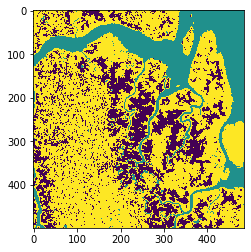

In [23]:
## Answer

classes = model.labels_.reshape(hh.shape)
plt.imshow(classes)

In [24]:
## Answer
profile['dtype'] = 'int32'
profile['nodata'] = None
with rasterio.open('classes.tif', 'w', **profile) as ds:
    ds.write(classes, 1)

Text(0, 0.5, 'HV (linear)')

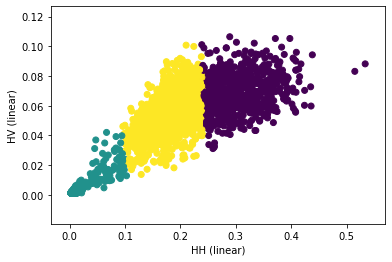

In [25]:
## Answer

N = 4000
indices = np.random.choice(np.arange(hh_tv.size), N)
plt.scatter(hh_tv.ravel()[indices], hv_tv.ravel()[indices], c=classes.ravel()[indices])
plt.xlabel('HH (linear)')
plt.ylabel('HV (linear)')

# Acknowledgements

A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.